In [161]:
# !pip install captum
#!pip install nglview

In [1]:
# Notebook dev tools
from typing import *
import copy

# General tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pytorch tools
import torch
import torch.nn as nn
from hydra.compose import GlobalHydra
from proteinworkshop.utils.notebook import *
from proteinworkshop.models.base import BenchMarkModel

init_hydra_singleton(reload=True)

path = HYDRA_CONFIG_PATH
rel_path = os.path.relpath(path, start=".")

GlobalHydra.instance().clear()
hydra.initialize(rel_path)

[05/24/23 11:55:03] WARNING  To use the Graphein submodule                                         ]8;id=727025;file:///home/atj39/github/graphein/graphein/protein/features/sequence/embeddings.py\embeddings.py]8;;\:]8;id=602558;file:///home/atj39/github/graphein/graphein/protein/features/sequence/embeddings.py#44\44]8;;\
                             graphein.protein.features.sequence.embeddings, you need to install:                   
                             biovec                                                                                
                             biovec cannot be installed via conda                                                  
                             Alternatively, you can install graphein with the extras:                              
                                                                                                                   
                             pip install graphein[extras]                                                          

[05/24/23 11:55:04] WARNING  To use the Graphein submodule graphein.protein.visualisation, you  ]8;id=188227;file:///home/atj39/github/graphein/graphein/protein/visualisation.py\visualisation.py]8;;\:]8;id=167992;file:///home/atj39/github/graphein/graphein/protein/visualisation.py#35\35]8;;\
                             need to install: pytorch3d                                                            
                             To do so, use the following command: conda install -c pytorch3d                       
                             pytorch3d                                                                             

                    WARNING  To use the Graphein submodule graphein.protein.meshes, you need to        ]8;id=380480;file:///home/atj39/github/graphein/graphein/protein/meshes.py\meshes.py]8;;\:]8;id=193639;file:///home/atj39/github/graphein/graphein/protein/meshes.py#29\29]8;;\
                             install: pytorch3d                                                                    
                             To do so, use the following command: conda install -c pytorch3d pytorch3d             

/home/atj39/github/protein_workshop/proteinworkshop/utils/notebook.py:38: UserWarning:


The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1



[05/24/23 11:55:05] INFO     Hydra initialised at /home/atj39/github/protein_workshop/configs.       ]8;id=527546;file:///home/atj39/github/protein_workshop/proteinworkshop/utils/notebook.py\notebook.py]8;;\:]8;id=497566;file:///home/atj39/github/protein_workshop/proteinworkshop/utils/notebook.py#39\39]8;;\

/tmp/ipykernel_2501090/2729727158.py:21: UserWarning:


The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1



hydra.initialize()

# Load model

## Configure

In [2]:
cfg = hydra.compose("template", overrides=["task=inverse_folding"], return_hydra_config=False)

In [16]:
model = BenchMarkModel(cfg)

ckpt = "/home/atj39/github/protein-workshop/logs/train/runs/2023-04-23_03-17-47/checkpoints/epoch_008.ckpt"
torch.load(ckpt)

model.load_state_dict(torch.load(ckpt)["state_dict"])

model = model.eval()

[05/24/23 11:56:49] INFO     Instantiating encoder...                                                   ]8;id=766204;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py\base.py]8;;\:]8;id=250763;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py#227\227]8;;\

                    INFO     GNNModel(                                                                  ]8;id=693482;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py\base.py]8;;\:]8;id=943677;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py#229\229]8;;\
                               (layers): Sequential(                                                               
                                 (0): GCNConv(-1, 128)                                                             
                                 (1): ReLU()                                                                       
                                 (2): Dropout(p=0.0, inplace=False)                                                
                                 (3): GCNConv(128, 128)                                                            
                                 (4): ReLU()                                                                       
                               )                                                                                   
                             )                                                                                     

                    INFO     Instantiating decoders...                                                  ]8;id=643671;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py\base.py]8;;\:]8;id=835923;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py#231\231]8;;\

                    INFO     Building residue_type decoder. Output dim 23                               ]8;id=502691;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py\base.py]8;;\:]8;id=947830;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py#142\142]8;;\

                    INFO     {'_target_': 'proteinworkshop.models.decoders.mlp_decoder.MLPDecoder', 'hidden_dim':   ]8;id=467902;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py\base.py]8;;\:]8;id=176228;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py#145\145]8;;\
                             [128, 128], 'dropout': 0.0, 'activations': ['relu', 'relu', 'none'],                  
                             'skip': 'concat', 'out_dim': 23, 'input': 'node_embedding'}                           

                    INFO     Using skip connection in decoder.                                    ]8;id=32886;file:///home/atj39/github/protein_workshop/proteinworkshop/models/decoders/mlp_decoder.py\mlp_decoder.py]8;;\:]8;id=877346;file:///home/atj39/github/protein_workshop/proteinworkshop/models/decoders/mlp_decoder.py#81\81]8;;\

/home/atj39/mambaforge/envs/workshop/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning:

Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.



                    INFO     ModuleDict(                                                                ]8;id=915130;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py\base.py]8;;\:]8;id=748946;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py#233\233]8;;\
                               (residue_type): MLPDecoder(                                                         
                                 (layers): LinearSkipBlock(                                                        
                                   (layers): ModuleList(                                                           
                                     (0-1): 2 x LazyLinear(in_features=0, out_features=128, bias=True)             
                                     (2): LazyLinear(in_features=0, out_features=23, bias=True)                    
                                   )                                                                               
                                   (activations): ModuleList(                                                      
                                     (0-1): 2 x ReLU()                                                             
                                     (2): Identity()                                                               
                                   )                                                                               
                                   (dropout_layers): ModuleList(                                                   
                                     (0-1): 2 x Dropout(p=0.0, inplace=False)                                      
                                   )                                                                               
                                 )                                                                                 
                               )                                                                                   
                             )                                                                                     

                    INFO     Instantiating losses...                                                    ]8;id=327347;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py\base.py]8;;\:]8;id=73448;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py#235\235]8;;\

                    INFO     Using losses: {'residue_type': CrossEntropyLoss()}                         ]8;id=335043;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py\base.py]8;;\:]8;id=41168;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py#237\237]8;;\

                    INFO     Not using aux loss scaling                                                 ]8;id=937385;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py\base.py]8;;\:]8;id=15487;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py#244\244]8;;\

                    INFO     Configuring metrics...                                                     ]8;id=582587;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py\base.py]8;;\:]8;id=954279;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py#246\246]8;;\

                    INFO     ['accuracy', 'f1_score', 'perplexity']                                     ]8;id=951147;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py\base.py]8;;\:]8;id=615509;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py#248\248]8;;\

                    INFO     Instantiating featuriser...                                                ]8;id=447594;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py\base.py]8;;\:]8;id=868570;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py#250\250]8;;\

                    INFO     ProteinFeaturiser(representation=CA,                                       ]8;id=719171;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py\base.py]8;;\:]8;id=893064;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py#252\252]8;;\
                             scalar_node_features=['amino_acid_one_hot'], vector_node_features=[],                 
                             edge_types=['knn_10'], scalar_edge_features=['edge_distance'],                        
                             vector_edge_features=[])                                                              

                    INFO     Instantiating task transform...                                            ]8;id=368564;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py\base.py]8;;\:]8;id=980591;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py#254\254]8;;\

                    INFO     None                                                                       ]8;id=401595;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py\base.py]8;;\:]8;id=972603;file:///home/atj39/github/protein_workshop/proteinworkshop/models/base.py#256\256]8;;\

                    DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=211795;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=817715;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:56:50] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=495496;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=418039;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:56:51] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=706785;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=942990;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:56:52] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=756488;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=13576;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:56:53] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=560249;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=268930;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:56:54] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=684611;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=387255;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:56:55] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=814047;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=751135;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

                    DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=7463;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=725797;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:56:56] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=919101;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=715577;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:56:57] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=407527;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=658042;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:56:58] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=872075;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=413127;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

                    DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=898129;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=977458;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:56:59] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=153775;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=690725;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:00] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=808841;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=841247;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:01] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=862491;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=177896;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

                    DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=120104;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=301402;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:02] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=850244;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=768618;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:03] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=668599;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=721273;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

                    DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=53072;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=175228;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:04] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=914742;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=140585;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:05] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=514853;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=633172;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:06] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=527898;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=565511;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:07] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=289852;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=575823;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:08] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=959038;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=89310;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:09] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=124987;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=773440;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:10] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=321548;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=531181;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:11] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=973593;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=507630;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:12] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=72974;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=841554;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:13] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=773767;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=205507;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:14] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=948660;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=300947;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

                    DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=449711;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=862514;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

[05/24/23 11:57:15] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=585865;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=182676;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

# Get Inputs

In [17]:
from graphein.protein.tensor.data import get_random_protein, ProteinBatch

input_data = get_random_protein()
input_data = ProteinBatch.from_data_list([input_data])
input_data = model.featurise(input_data)

baseline = copy.deepcopy(input_data)
baseline.x = torch.zeros_like(input_data.x)


input_data, baseline

[05/24/23 11:57:26] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=246110;file:///home/atj39/github/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=424115;file:///home/atj39/github/graphein/graphein/protein/graphs.py#187\187]8;;\

(ProteinProteinBatch(fill_value=[1], atom_list=[1], residue_type=[574], residue_id=[1], id=[1], residues=[1], coords=[574, 37, 3], chains=[574], x=[574, 23], pos=[574, 3], edge_index=[2, 5740], edge_type=[1, 5740], num_relation=1, edge_attr=[5740, 1]),
 ProteinProteinBatch(fill_value=[1], atom_list=[1], residue_type=[574], residue_id=[1], id=[1], residues=[1], coords=[574, 37, 3], chains=[574], x=[574, 23], pos=[574, 3], edge_index=[2, 5740], edge_type=[1, 5740], num_relation=1, edge_attr=[5740, 1]))

In [18]:
# Get label
label = model.get_labels(input_data)
label

{'residue_type': tensor[574] i64 x∈[0, 22] μ=10.111 σ=6.467}

In [19]:
TARGET = "residue_type"

# Attribute!

In [20]:
from captum.attr import IntegratedGradients

class AttributionWrapper(nn.Module):
    def __init__(self, model: nn.Module, output: str):
        super().__init__()
        self.model = model
        self.output = output

    def forward(self, node_feats, batch):
        batch.x = node_feats
        out = model.forward(batch)
        return out[self.output]


attr_model = AttributionWrapper(model, TARGET)

ig = IntegratedGradients(attr_model)

attributions, approximation_error = ig.attribute(input_data.x,
                                                 baselines=baseline.x,
                                                 method='gausslegendre',
                                                 return_convergence_delta=True,
                                                 additional_forward_args=(input_data),
                                                 target=label[TARGET]
                                                 )

attributions, approximation_error

(tensor[574, 23] f64 n=13202 x∈[0., 11.288] μ=0.379 σ=1.788,
 tensor[574] f64 x∈[-1.705, 8.081] μ=3.543 σ=1.241)

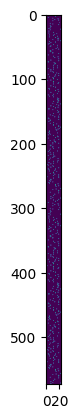

In [21]:
plt.imshow(attributions)

## Visualise Attributions

In [22]:
df = input_data.to_dataframe()
df

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,VAL,,0,1,,...,19.323000,29.726999,42.780998,1.0,0.0,,,N,0,1
1,ATOM,2,,CA,,VAL,,0,1,,...,20.141001,30.469000,42.414001,1.0,0.0,,,C,0,2
2,ATOM,3,,C,,VAL,,0,1,,...,21.664000,29.857000,42.548000,1.0,0.0,,,C,0,3
3,ATOM,4,,O,,VAL,,0,1,,...,21.985001,29.541000,43.703999,1.0,0.0,,,O,0,4
4,ATOM,5,,CB,,VAL,,0,1,,...,19.886999,31.917999,43.523998,1.0,0.0,,,C,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,ATOM,4380,,CD2,,HIS,,3,574,,...,12.608000,-2.661000,24.150000,1.0,0.0,,,C,0,4380
4380,ATOM,4381,,CE1,,HIS,,3,574,,...,13.837000,-3.447000,22.948000,1.0,0.0,,,C,0,4381
4381,ATOM,4382,,NE2,,HIS,,3,574,,...,12.427000,-2.792000,22.587999,1.0,0.0,,,N,0,4382
4382,ATOM,4383,,ND1,,HIS,,3,574,,...,14.250000,-3.363000,23.466999,1.0,0.0,,,N,0,4383


In [23]:
import torch.nn.functional as F
# Sum residue-wise
attributions = attributions.sum(dim=-1).detach().numpy()

# Scale 0-1
attributions = (attributions - np.min(attributions)) / (np.max(attributions) - np.min(attributions))
attributions *= 100

attributions

array([5.89156122e+01, 6.15223668e+01, 4.89371641e+01, 9.95850123e+01,
       4.61441554e+01, 4.37533272e+01, 3.51021171e+01, 6.94916308e+01,
       6.38562384e+01, 5.90831854e+01, 3.51378312e+01, 4.65188497e+01,
       4.66610116e+01, 2.26293081e+00, 3.81081360e+01, 3.49361546e+01,
       5.88842825e+01, 3.81322365e+01, 4.63909267e+01, 7.74984534e+01,
       4.66419490e+01, 3.85496102e+01, 6.34899023e+01, 3.12351240e+01,
       3.84823760e+01, 4.65042738e+01, 6.35912328e+01, 4.63466167e+01,
       6.17367412e+01, 6.34673636e+01, 2.71389657e+01, 4.63294565e+01,
       4.55758170e+01, 6.16360412e+01, 4.88545218e+01, 4.55649108e+01,
       9.98174111e+01, 6.98031584e+01, 6.98511368e+01, 3.48777244e+01,
       6.97019043e+01, 3.12801761e+01, 4.54688362e+01, 9.96296630e+01,
       7.75098657e+01, 4.53858607e+01, 4.36804003e+01, 6.13649247e+01,
       4.89770418e+01, 7.74986383e+01, 3.80692064e+01, 4.90905615e+01,
       4.60759915e+01, 5.24598774e+01, 5.87437381e+01, 3.50669029e+01,
      

In [24]:
# Whether to tile per-residue attributions over
# all atoms in that residue
TILE = True

if not TILE:
    df = df.loc[df["atom_name"] == "CA"]
    df["b_factor"] = attributions
else:
    res_ids = df["chain_id"].astype(str) + df["residue_name"] + df["residue_number"].astype(str)
    N_ATOM_PER_RES = pd.Series(res_ids).value_counts(sort=False).values
    attributions = np.repeat(attributions, N_ATOM_PER_RES)
    df["b_factor"] = attributions

df

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,VAL,,0,1,,...,19.323000,29.726999,42.780998,1.0,58.915612,,,N,0,1
1,ATOM,2,,CA,,VAL,,0,1,,...,20.141001,30.469000,42.414001,1.0,58.915612,,,C,0,2
2,ATOM,3,,C,,VAL,,0,1,,...,21.664000,29.857000,42.548000,1.0,58.915612,,,C,0,3
3,ATOM,4,,O,,VAL,,0,1,,...,21.985001,29.541000,43.703999,1.0,58.915612,,,O,0,4
4,ATOM,5,,CB,,VAL,,0,1,,...,19.886999,31.917999,43.523998,1.0,58.915612,,,C,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,ATOM,4380,,CD2,,HIS,,3,574,,...,12.608000,-2.661000,24.150000,1.0,77.603040,,,C,0,4380
4380,ATOM,4381,,CE1,,HIS,,3,574,,...,13.837000,-3.447000,22.948000,1.0,77.603040,,,C,0,4381
4381,ATOM,4382,,NE2,,HIS,,3,574,,...,12.427000,-2.792000,22.587999,1.0,77.603040,,,N,0,4382
4382,ATOM,4383,,ND1,,HIS,,3,574,,...,14.250000,-3.363000,23.466999,1.0,77.603040,,,N,0,4383


In [25]:
# Write to PDB
from biopandas.pdb import PandasPdb
ppdb = PandasPdb()
ppdb.df["ATOM"] = df
ppdb.to_pdb("test.pdb")


In [27]:
import nglview

view = nglview.show_structure_file("test.pdb", default_representation=False)  # Load the saved structure
view.add_cartoon("protein", color_scheme="bfactor") # Colour by attribution
view.add_surface("protein", opacity=0.3, color_scheme="bfactor") # Add a surface
view.center()
view


NGLWidget()